In [ ]:
#importing libraries
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [ ]:
#importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [ ]:
#uploading kaggle.json file
!pip install Kaggle

In [ ]:
kaggle_credentials=json.load(open("kaggle.json"))

In [ ]:
# setting up Kaggle API key as environmental variables
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [ ]:
#API
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [ ]:
#to show all filles
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [ ]:
#unzip the downloaded dataset
with ZipFile('plantvillage-dataset.zip','r') as zip_ref:
  zip_ref.extractall()

In [ ]:
print(os.listdir("plantvillage dataset"))
print(len(os.listdir("plantvillage dataset/segmented")))
print (os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print (os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print (os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Tomato___Target_Spot', 'Corn_(maize)___Common_rust_', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Potato___healthy']
38
['Tomato___Target_Spot', 'Corn_(maize)___Common_rust_', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Potato___healthy']
38
['Tomato___Target_Spot', 'Corn_(maize)___Common_rust_', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Late_blight', 'Potato___healthy']


In [ ]:
print (len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['12ad3257-385c-43f3-bed7-629d15c7d581___Mt.N.V_HL 6104.JPG', '8bd312c9-5a9c-4ac7-ae60-cbc2600a23aa___Mt.N.V_HL 6128.JPG', 'feb2cf1a-1903-4fb8-bc99-4b399346fef0___Mt.N.V_HL 6135.JPG', '72cd93bf-63f6-476a-b3ae-43af2006c9f2___Mt.N.V_HL 6132.JPG', 'bd7f0429-550b-4e28-95af-98e56b282437___Mt.N.V_HL 6130.JPG']


(256, 256, 3)


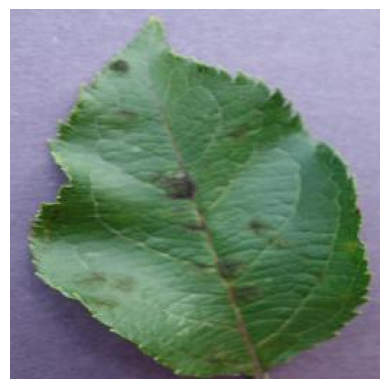

In [ ]:
#PREPROCESSING

#datset path
base_dir='plantvillage dataset/color'

#read the image
image_path='/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img=mping.imread(image_path)
print(img.shape)

#display the image
plt.imshow(img)
plt.axis('off') #turn off axis numbers
plt.show()

In [ ]:
#resize all images to same size
img_size=224
batch_size=32

In [ ]:
#TRAIN TEST SPLIT
#image data generator
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
#train generator
train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [ ]:
#validation generator
validation_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',class_mode='categorical'
)


Found 10849 images belonging to 38 classes.


In [ ]:
#CONVULATIONAL NEURAL NETWORK
model= models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    23,888,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,038 (91.20 MB)

 Trainable params: 23,908,038 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#complile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#MODEL TRAINING
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 99s 69ms/step - accuracy: 0.5444 - loss: 1.8083 - val_accuracy: 0.8326 - val_loss: 0.5357
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 94s 69ms/step - accuracy: 0.8799 - loss: 0.3764 - val_accuracy: 0.8527 - val_loss: 0.4835
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 141s 104ms/step - accuracy: 0.9502 - loss: 0.1562 - val_accuracy: 0.8539 - val_loss: 0.5103
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 96s 70ms/step - accuracy: 0.9667 - loss: 0.1011 - val_accuracy: 0.8789 - val_loss: 0.5071
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 70ms/step - accuracy: 0.9777 - loss: 0.0702 - val_accuracy: 0.8643 - val_loss: 0.5882


In [ ]:
#MODEL EVALUATION
print("Evaluating model...")
val_loss,val_accuracy=model.evaluate(validation_generator,steps=validation_generator.samples//batch_size)
print(f"Validation Accuracy:{val_accuracy*100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.8664 - loss: 0.5841
Validation Accuracy:86.44%


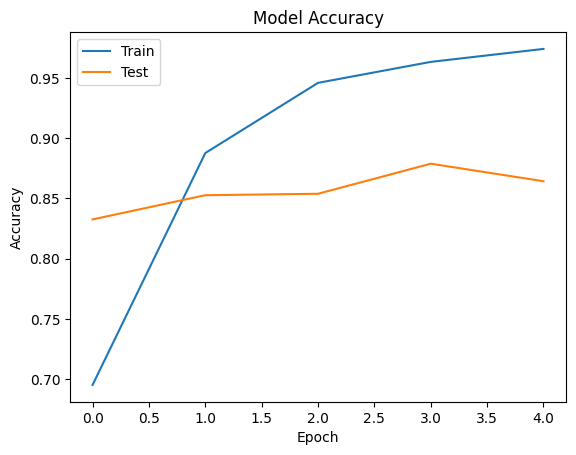

In [ ]:
#Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

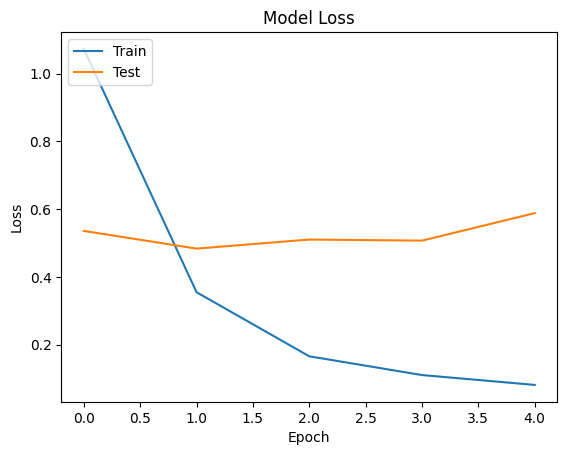

In [ ]:
#Plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [ ]:
#BUILDING A PREDICTIVE SYSTEM
#Function to load and preprocess the image using pillow
def load_and_preprocess_image(image_path,target_size=(224,224)):
  #load the image
  img=Image.open(image_path)
  #Resize the imahe
  img=img.resize(target_size)
  #convert image to numpy array
  img_array=np.array(img)
  #Add batch dimension
  img_array=np.expand_dims(img_array,axis=0)
  #scale the image dimension to[0,1]
  img_array=img_array.astype('float32')/255.
  return img_array

In [ ]:
#function to predict the class of an Image
def predict_image_class(model,image_path,class_indices):
  preprocessed_img=load_and_preprocess_image(image_path)
  predictions=model.predict(preprocessed_img)
  predicted_class_index=np.argmax(predictions,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name


In [ ]:
class_indices={v: k for k,v in train_generator.class_indices.items()}

In [ ]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:
json.dump(class_indices,open('class_indices.json','w'))

In [ ]:
image_path='/content/test_potato_early_blight.jpg'
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("Predicted class name:",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
Predicted class name: Potato___Early_blight


In [ ]:
image_path='/content/test_apple_black_rot.JPG'
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("Predicted class name:",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class name: Apple___Black_rot


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: true and predicted labels
y_true = [0, 1, 1, 0, 1, 2, 2, 2]      # ground truth
y_pred = [0, 0, 1, 0, 1, 2, 1, 2]      # predicted labels

# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision, Recall, F1-Score (macro = average across all classes equally)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Print results
print(f'Precision: {precision:.2f}')
print(f'Recall:    {recall:.2f}')
print(f'F1-score:  {f1:.2f}')


Precision: 0.78
Recall:    0.78
F1-score:  0.76


In [ ]:
image_path='/content/first.jpeg'
predicted_class_name=predict_image_class(model,image_path,class_indices)
print("Predicted class name:",predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class name: Potato___Early_blight
